In [ ]:
!pip install pm4py
!pip install bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from Bio import SeqIO
from datetime import datetime
import pm4py
from pm4py.algo.discovery.correlation_mining import algorithm as correlation_miner

In [ ]:
df = pd.DataFrame(columns=['sequence', 'base', 'timestamp'])
k=3
j=1
fasta_sequences = SeqIO.parse(open('seqs.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    for i in range(0, len(sequence), j):
        df = df.append({'case:concept:name': name, 'concept:name': sequence[i: i+k], 'time:timestamp': datetime.fromtimestamp(500 * i)}, ignore_index=True)
df = pm4py.format_dataframe(df)
df = df[["concept:name", "time:timestamp"]]

In [ ]:
df.head()

,concept:name,time:timestamp
0,aca,1970-01-01 00:00:00
1,caa,1970-01-01 00:08:20
2,aac,1970-01-01 00:16:40
3,acg,1970-01-01 00:25:00
4,cgg,1970-01-01 00:33:20


In [ ]:
frequency_dfg, performance_dfg = correlation_miner.apply(
    df, 
    parameters={
        correlation_miner.Variants.CLASSIC.value.Parameters.ACTIVITY_KEY: "concept:name",
        correlation_miner.Variants.CLASSIC.value.Parameters.TIMESTAMP_KEY: "time:timestamp"
    }
)      

In [ ]:
frequency_dfg

{('a', 'aac'): 34,
 ('aa', 'a'): 7,
 ('aaa', 'aac'): 4,
 ('aaa', 'ctg'): 17,
 ('aac', 'aa'): 7,
 ('aac', 'acg'): 8,
 ('aac', 'act'): 4,
 ('aac', 'tgt'): 19,
 ('aag', 'tag'): 11,
 ('aag', 'tca'): 14,
 ('aag', 'tga'): 2,
 ('aat', 'aga'): 10,
 ('aat', 'tg'): 3,
 ('aat', 'tt'): 3,
 ('ac', 'g'): 11,
 ('aca', 'ttg'): 21,
 ('acc', 'ccc'): 48,
 ('acg', 'ctg'): 1,
 ('acg', 'ggg'): 12,
 ('acg', 'tga'): 9,
 ('act', 'taa'): 21,
 ('act', 'tgt'): 2,
 ('ag', 'c'): 5,
 ('aga', 'acc'): 3,
 ('aga', 'gaa'): 6,
 ('aga', 'gat'): 23,
 ('aga', 'ggt'): 13,
 ('agc', 'acc'): 38,
 ('agg', 'gac'): 16,
 ('agg', 'gca'): 6,
 ('agg', 'gcc'): 17,
 ('agg', 'gga'): 17,
 ('agt', 'gca'): 11,
 ('agt', 'gta'): 23,
 ('agt', 'gtt'): 14,
 ('at', 't'): 7,
 ('ata', 'ctt'): 6,
 ('ata', 'gct'): 5,
 ('ata', 'tcg'): 10,
 ('atc', 'ccc'): 2,
 ('atc', 'gtc'): 24,
 ('atc', 'tcc'): 3,
 ('atg', 'cgg'): 21,
 ('atg', 'tta'): 7,
 ('att', 'cta'): 8,
 ('att', 'tcg'): 7,
 ('c', 'aag'): 27,
 ('c', 'acg'): 2,
 ('ca', 'c'): 7,
 ('caa', 'act'): 19,

In [ ]:
activities_freq = dict(df["concept:name"].value_counts())

In [ ]:
activities_freq

{'cca': 169,
 'ccc': 120,
 'cag': 118,
 'gcc': 113,
 'ggc': 92,
 'agg': 56,
 'tgg': 48,
 'acc': 48,
 'agt': 48,
 'aga': 45,
 'cac': 40,
 'gtg': 39,
 'agc': 38,
 'aac': 38,
 'caa': 36,
 'cat': 36,
 'tcc': 36,
 'a': 34,
 'ggg': 34,
 'c': 29,
 'atc': 29,
 'atg': 28,
 'aag': 27,
 'gag': 26,
 'cgg': 26,
 'tgc': 25,
 'gca': 25,
 'gaa': 25,
 'tac': 24,
 'gtc': 24,
 'gat': 23,
 'act': 23,
 'gta': 23,
 'acg': 22,
 'aca': 21,
 'tgt': 21,
 'aaa': 21,
 't': 21,
 'gtt': 21,
 'ttg': 21,
 'taa': 21,
 'gcg': 21,
 'ata': 21,
 'cgc': 20,
 'gct': 19,
 'cga': 19,
 'cta': 19,
 'ccg': 19,
 'tat': 18,
 'ggt': 18,
 'ctg': 18,
 'tcg': 17,
 'gga': 17,
 'cgt': 17,
 'ttc': 17,
 'ttt': 16,
 'gac': 16,
 'g': 16,
 'aat': 16,
 'att': 15,
 'tga': 15,
 'tca': 14,
 'ctt': 14,
 'tta': 14,
 'tct': 12,
 'tag': 11,
 'ac': 11,
 'ga': 10,
 'ta': 10,
 'ctc': 9,
 'cct': 8,
 'ca': 7,
 'at': 7,
 'aa': 7,
 'gc': 6,
 'gt': 6,
 'tc': 6,
 'cc': 6,
 'ag': 5,
 'gg': 5,
 'ct': 5,
 'tg': 3,
 'cg': 3,
 'tt': 3}

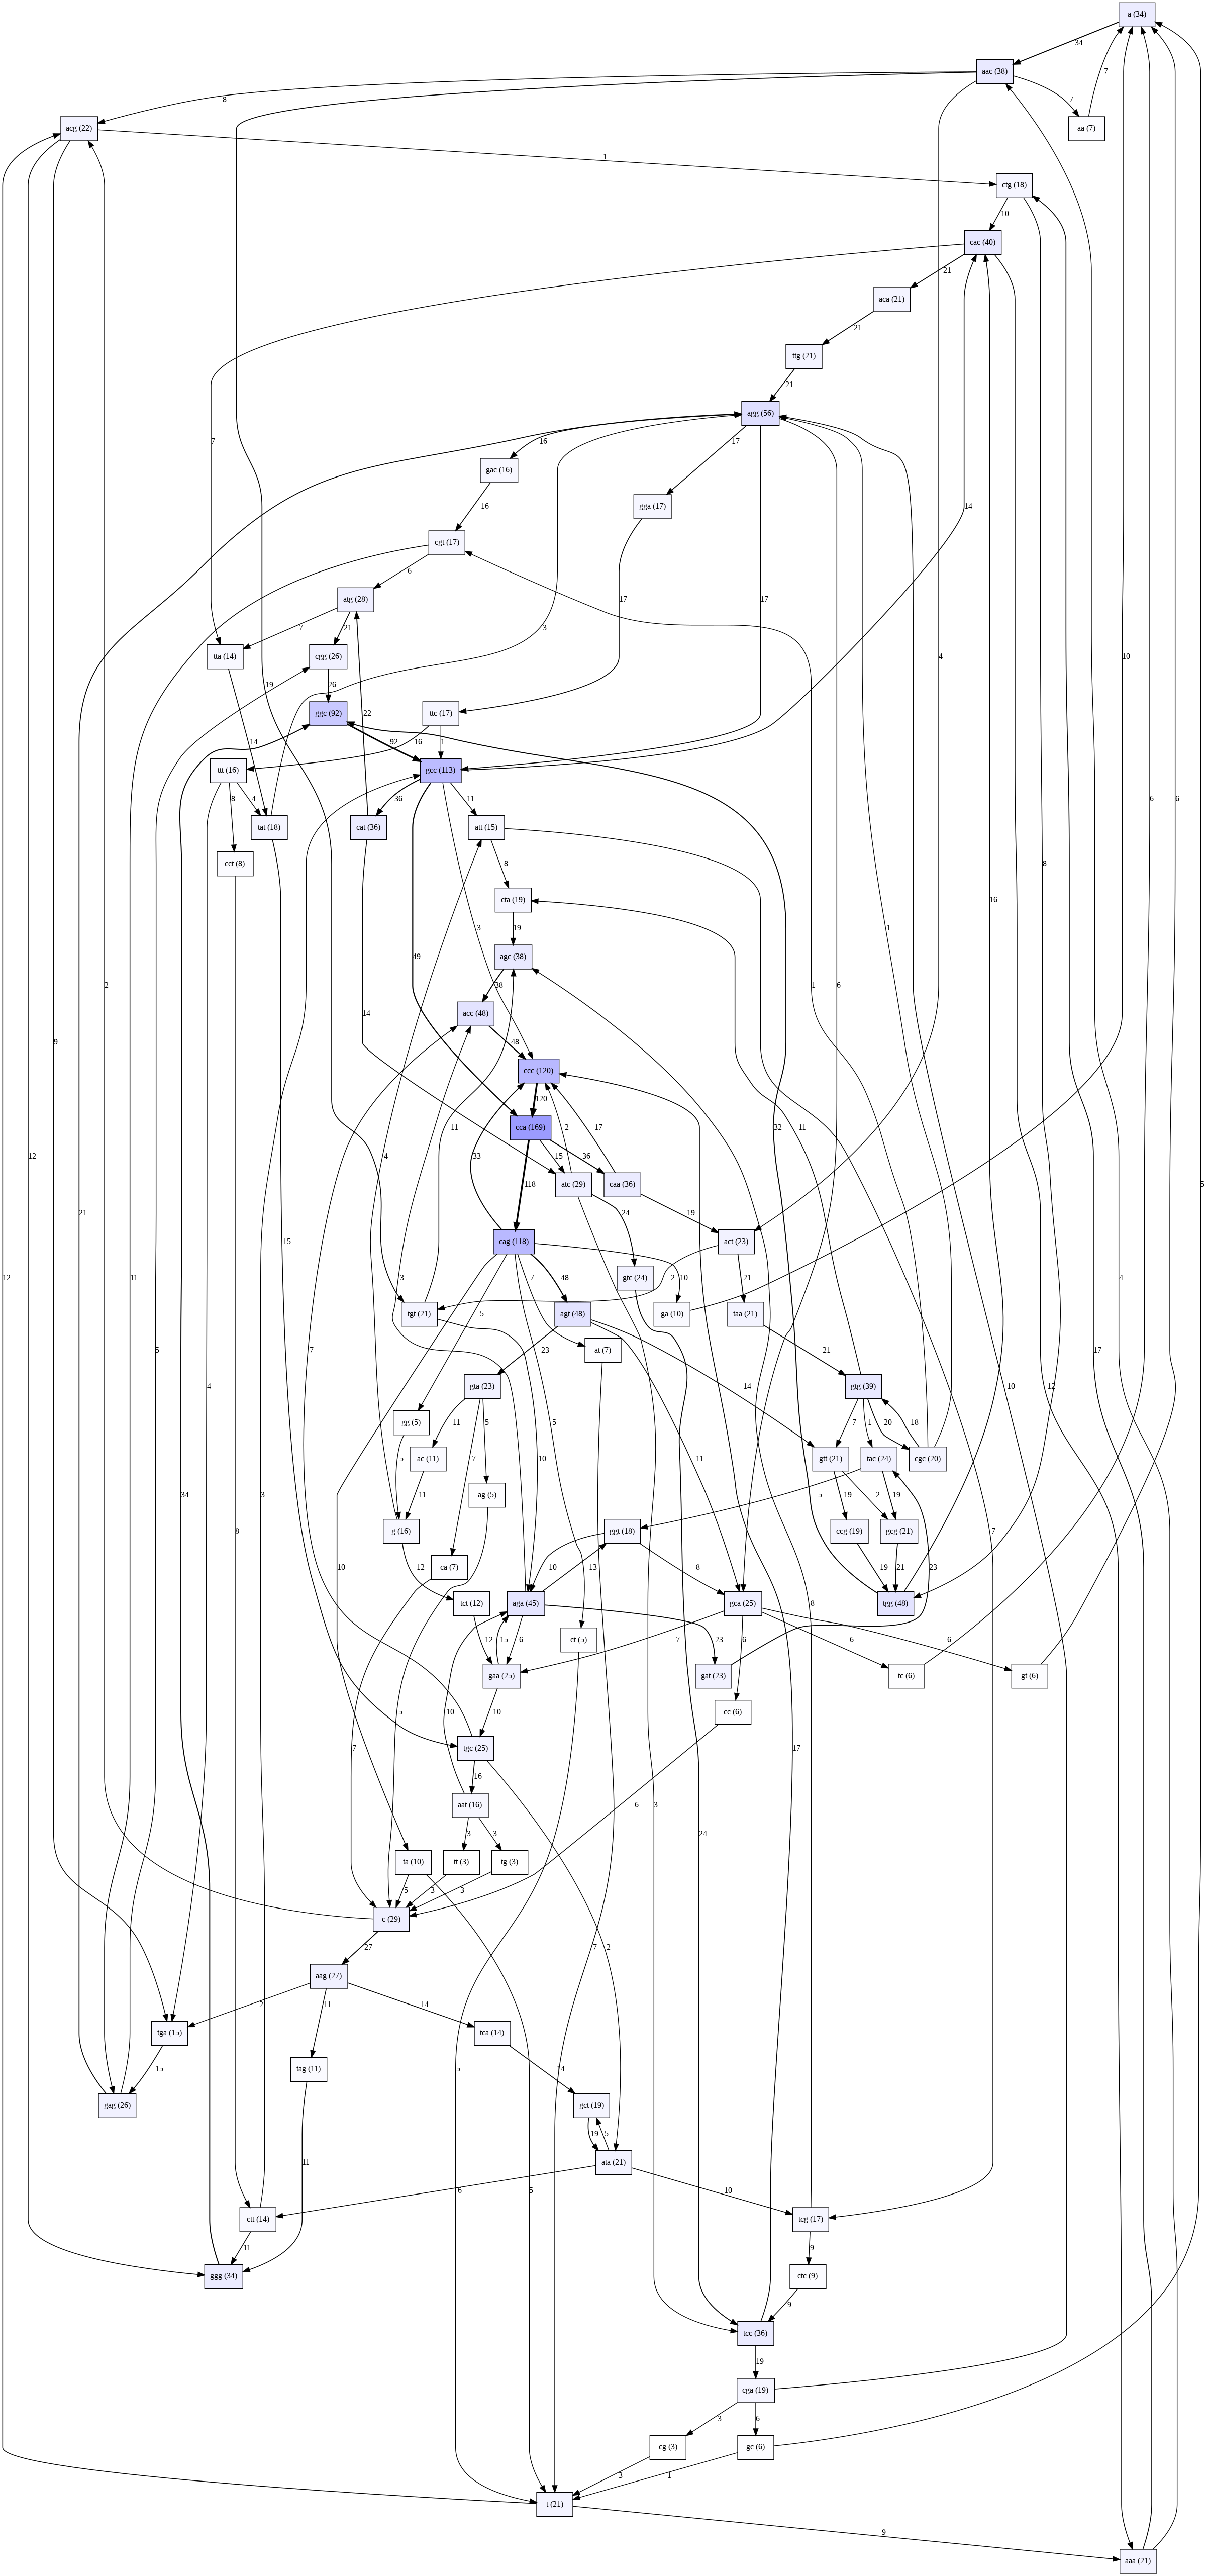

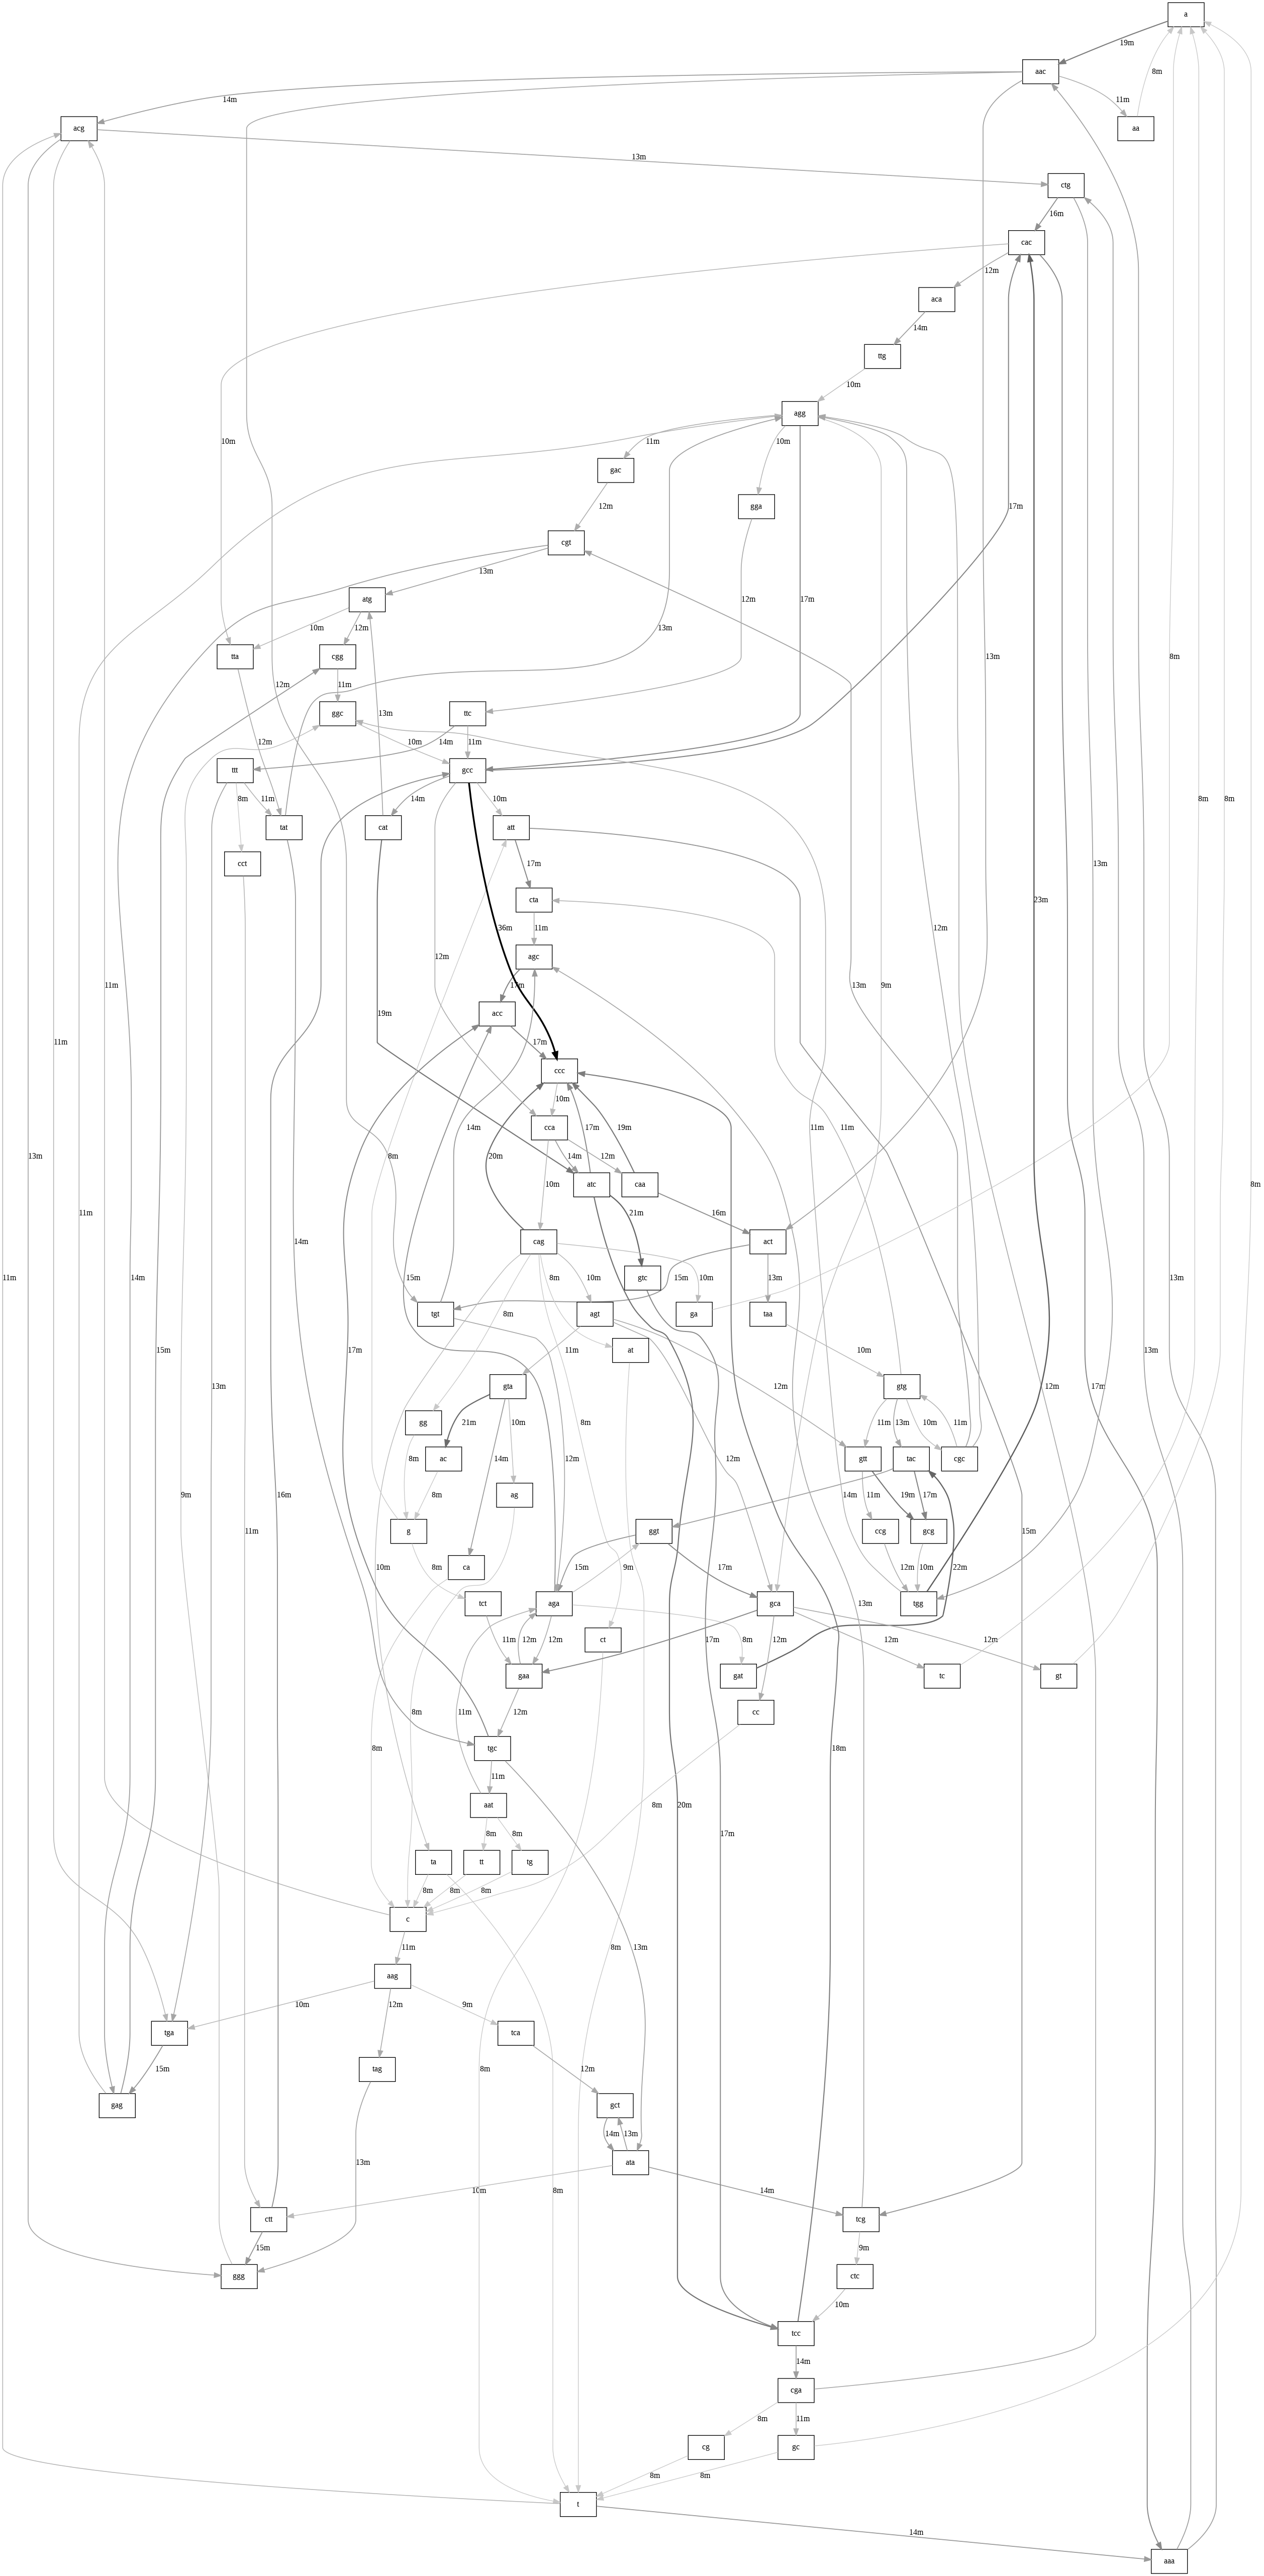

In [ ]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer
gviz_freq = dfg_visualizer.apply(frequency_dfg, variant=dfg_visualizer.Variants.FREQUENCY, activities_count=activities_freq)
gviz_perf = dfg_visualizer.apply(performance_dfg, variant=dfg_visualizer.Variants.PERFORMANCE, activities_count=activities_freq)
dfg_visualizer.view(gviz_freq)
dfg_visualizer.view(gviz_perf)